## DGL mit Sympy lösen

<div class="alert alert-block alert-warning">
    
<b>Example 1</b>

Let us consider the ordinary differential equation
    
$$
    y'(x) + \frac{y(x)}{x} = \frac{2}{1 + x^2} \, .
$$  
</div>

In [1]:
import sympy as sp
sp.init_printing()

x = sp.Symbol('x')
y = sp.Function('y')(x)

yp = sp.Derivative(y)
ode = sp.Eq(yp+y/x,2/(1+x**2))
sp.dsolve(ode)

<div class="alert alert-block alert-warning">
    
<b>Example 2</b>    
    
$$
    y''(x) + 2 \, y'(x) + 2 \, y(x) = 0 \, .
$$
</div>

In [2]:
t = sp.symbols('t')
x = sp.Function('x')(t)
xp = sp.Derivative(x)
xpp = sp.Derivative(xp)
ode = sp.Eq(xpp + 2*xp + 2*x,0)
sp.dsolve(ode)

## DGL mit Parametern

<div class="alert alert-block alert-warning">
    
<b>Example</b>

The differential equation of an oscillation can be formulated by
    
$$
    \ddot{x}(t) + 2 \, \delta \, \dot{x}(t) + \omega_0^2 \, x(t) = 0 \, .
$$  
</div>

In [24]:
t, delta, omega_0 = sp.symbols('t, delta, omega_0')
x = sp.Function('x')(t)
xp = sp.Derivative(x)
xpp = sp.Derivative(xp)
ode = sp.Eq(xpp+2*delta*xp+omega_0**2*x,0)
sp.dsolve(ode)


## Anfangswert-Problem

<div class="alert alert-block alert-warning">
    
<b>Example 1</b>

Let us consider the initial value problem
    
$$
    \ddot{x}(t) + 2 \, \dot{x}(t) - 3 \, x(t) = 2 \, \sin(t),  \quad x(0) = 0, \, \dot{x}(0) = 1 \, .
$$  
</div>

In [19]:
import sympy as sp

t = sp.Symbol('t')
x = sp.Function('x')(t)
xp = sp.Derivative(x, t) #1. Ableitung
xpp = sp.Derivative(x, t, t) #2. Ableitung

# Differentialgleichung
ode = sp.Eq(xpp + 2*xp - 3*x, 2*sp.sin(t))
ode
# Anfangsbedingungen
initconds = {x.subs(t, 0): 0, xp.subs(t, 0): 1}

# Differentialgleichung lösen
sol = sp.dsolve(ode, ics=initconds)

# Homogene Lösung
homogeneous_solution = sp.dsolve(xpp + 2*xp - 3*x, x)
print("Homogene Lösung:")
homogeneous_solution

Homogene Lösung:


In [20]:
# Inhomogene Lösung
inhomogeneous_solution = sol.rhs - homogeneous_solution.rhs
print("\nInhomogene Lösung:")
inhomogeneous_solution


Inhomogene Lösung:


In [21]:
# Gesamtlösung
print("\nGesamtlösung:")
sol


Gesamtlösung:


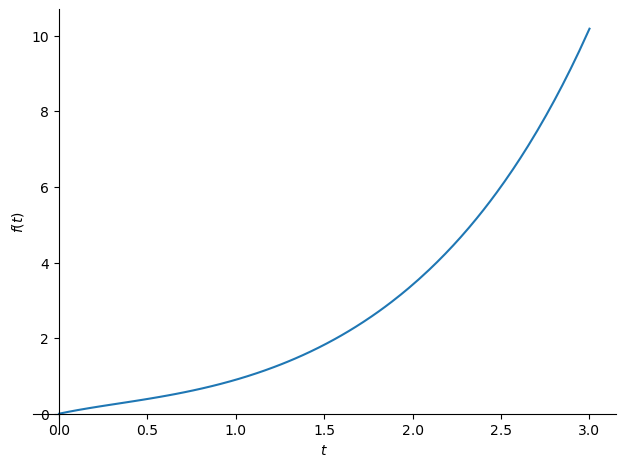

In [22]:
#plot it
sp.plot(sol.rhs,(t,0.0,3.0))
x = sp.lambdify(t,sol.rhs)
x(1.0)

<div class="alert alert-block alert-warning">
    
<b>Example 2</b>

Radioactive decay, with decay rate $\lambda$, can be desribed by the initial value problem

$$
\frac{\dot{N}(t)}{ N(t)} = -\lambda, \quad N(0) = N_0.
$$
    
Calculate the solution with SymPy.
</div>

In [7]:
# Step 2: Define symbols and variables
t = sp.symbols('t')
N = sp.Function('N')(t)
N0, lmbda = sp.symbols('N0 lambda', real=True, positive=True)

# Step 3: Define the differential equation
ode = sp.Eq(sp.Derivative(N, t)/N, -lmbda)

# Step 4: Solve the differential equation
solution = sp.dsolve(ode)

# Step 5: Substitute the initial condition
conds = solution.subs({N.subs(t, 0): N0})

# Step 6: Display the solution
display(conds)
